In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

## Hanging chain problem

In [2]:
opti = ca.Opti()
N = 20
D = 70.0 * N  # spring constant [N / m]
m = 40.0 / N  # mass per length [kg / m]
L = 1.0 # spring rest length * N
g = 9.81

In [3]:
p = opti.variable(2, N)
x = p[0, :]
y = p[1, :]

V = 0.5*ca.sum2( D * (ca.sqrt((x[:-1] - x[1:])**2 + (y[:-1]-y[1:])**2) - L/N)**2)  # spring energy
V = V + g*ca.sum2(m*y)  #  gravity energy

In [4]:
opti.minimize(V)

opti.subject_to(p[:,0] == [-2, 1])
opti.subject_to(p[:,-1] == [2, 1])
opti.subject_to(y >= ca.cos(0.1 * x) - 0.5);

opti.solver('ipopt');

opti.set_initial(x, np.linspace(-2,2,N));
opti.set_initial(y,1);

In [5]:
%%capture
sol = opti.solve()

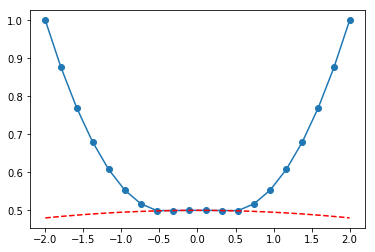

In [6]:
plt.plot(sol.value(x),sol.value(y),'-o')
xs = np.linspace(-2,2,1000);
plt.plot(xs, np.cos(0.1*xs)-0.5,'--r')